In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
sns.set_palette('Set3')
df=pd.read_csv('/content/telecom_churn.csv')
df

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44.0,45.0,-361.0,0.0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62.0,39.0,5973.0,0.0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49.0,24.0,193.0,1.0
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80.0,25.0,9377.0,1.0
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78.0,15.0,1393.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163062,163063,BSNL,M,58,Tripura,Bangalore,281233,2022-03-27,3,60411,72.0,42.0,2571.0,0.0
163063,163064,Vodafone,M,34,Tamil Nadu,Bangalore,202221,2022-03-27,3,82045,10.0,2.0,-581.0,0.0
163064,163065,Vodafone,M,51,Madhya Pradesh,Delhi,569917,2022-03-27,0,124290,30.0,11.0,5691.0,0.0
163065,163066,Airtel,M,30,Bihar,Delhi,759569,2022-03-27,1,65569,68.0,11.0,4016.0,0.0


In [ ]:
print(df.columns)  # Check the column names
print(df.head())    # Print the first few rows of the DataFrame



Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')
   customer_id telecom_partner gender  age              state     city  \
0            1    Reliance Jio      F   25          Karnataka  Kolkata   
1            2    Reliance Jio      F   55            Mizoram   Mumbai   
2            3        Vodafone      F   57  Arunachal Pradesh    Delhi   
3            4            BSNL      M   46         Tamil Nadu  Kolkata   
4            5            BSNL      F   26            Tripura    Delhi   

   pincode date_of_registration  num_dependents  estimated_salary  calls_made  \
0   755597           2020-01-01               4            124962        44.0   
1   125926           2020-01-01               2            130556        62.0   
2   423976           2020-01-01               0            148828        49.0  

In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              1
sms_sent                1
data_used               1
churn                   1
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Example: Creating a new feature 'TotalCharges' from 'calls_made' and 'sms_sent'
df['TotalCharges'] = df['calls_made'] + df['sms_sent']

# You can create more features based on your domain knowledge and dataset.

# Feature scaling (optional, depending on the algorithm you plan to use)
scaler = StandardScaler()
numerical_features = ['age', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'TotalCharges']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_features = ['telecom_partner', 'gender', 'state', 'city', 'date_of_registration']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# For the 'churn' column (target variable), if it's already binary (0 or 1), no need to encode it.
# If it's not binary, you can convert it to binary values.
# Example: df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
# Display the first few rows of the DataFrame after preprocessing
print(df.head())

   customer_id  telecom_partner  gender       age  state  city  pincode  \
0            1                2       0 -1.284567     10     4   755597   
1            2                2       0  0.540376     16     5   125926   
2            3                3       0  0.662038      1     2   423976   
3            4                1       1 -0.007107     22     4   522841   
4            5                1       0 -1.223736     24     2   740247   

   date_of_registration  num_dependents  estimated_salary  calls_made  \
0                     0        1.416117          1.063323   -0.167823   
1                     0        0.001193          1.212241    0.443844   
2                     0       -1.413731          1.698660    0.002085   
3                     0       -0.706269         -1.232473    1.055510   
4                     0        0.001193         -0.796527    0.987547   

   sms_sent  data_used  churn  TotalCharges  
0  1.428553  -1.816812    0.0      0.891292  
1  1.021052   0.33

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


        customer_id  telecom_partner         gender           age  \
count  163067.00000    163067.000000  163067.000000  1.630670e+05   
mean    81534.00000         1.499991       0.598754 -1.795235e-17   
std     47073.53251         1.117173       0.490152  1.000003e+00   
min         1.00000         0.000000       0.000000 -1.710387e+00   
25%     40767.50000         1.000000       0.000000 -8.587472e-01   
50%     81534.00000         2.000000       1.000000 -7.107264e-03   
75%    122300.50000         2.000000       1.000000  8.445327e-01   
max    163067.00000         3.000000       1.000000  1.696173e+00   

               state           city        pincode  date_of_registration  \
count  163067.000000  163067.000000  163067.000000         163067.000000   
mean       13.500254       2.498476  549765.959581            407.580197   
std         8.074901       1.706818  259751.916773            235.607276   
min         0.000000       0.000000  100006.000000              0.000000  

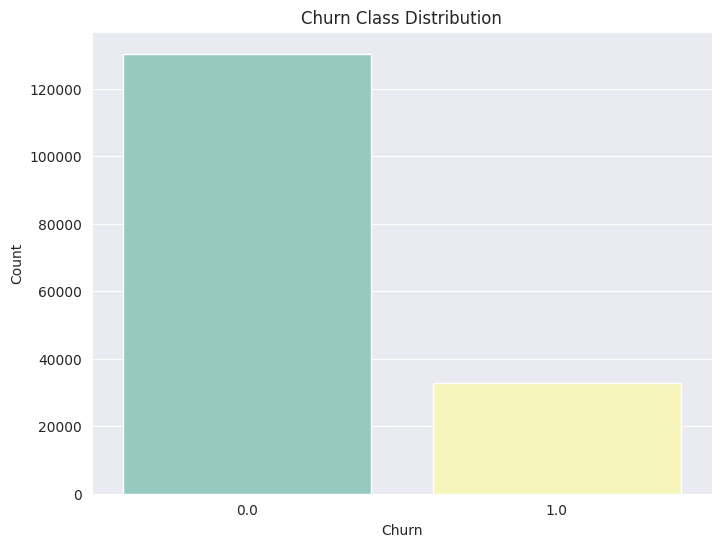

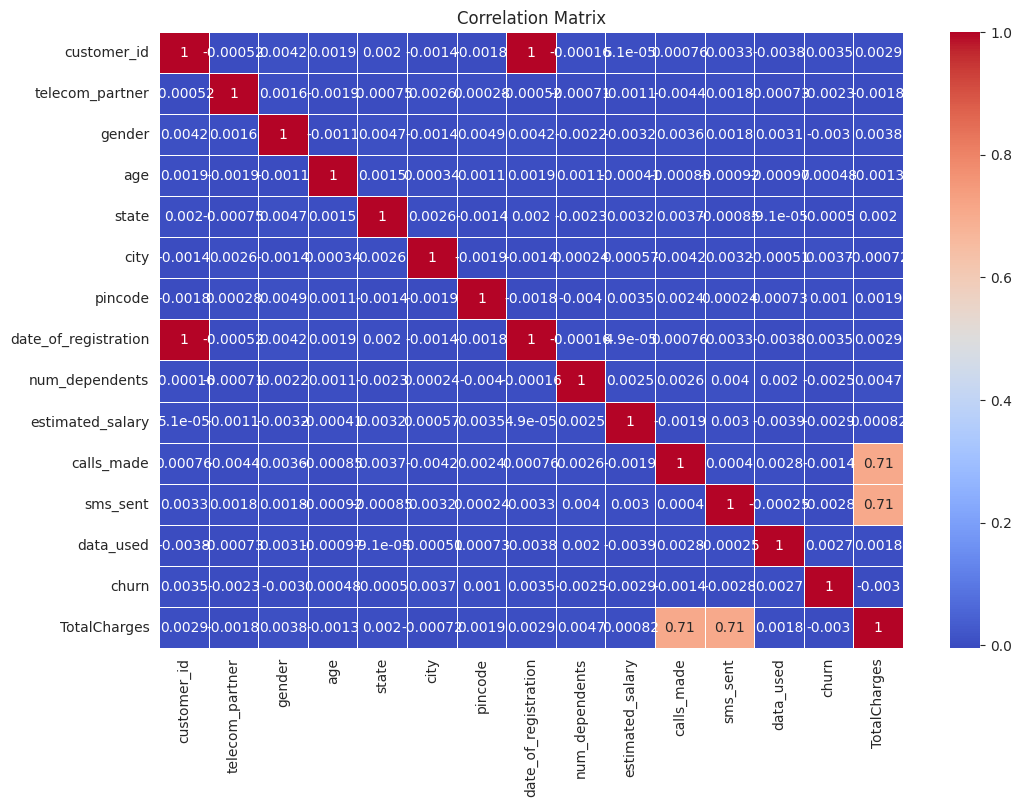

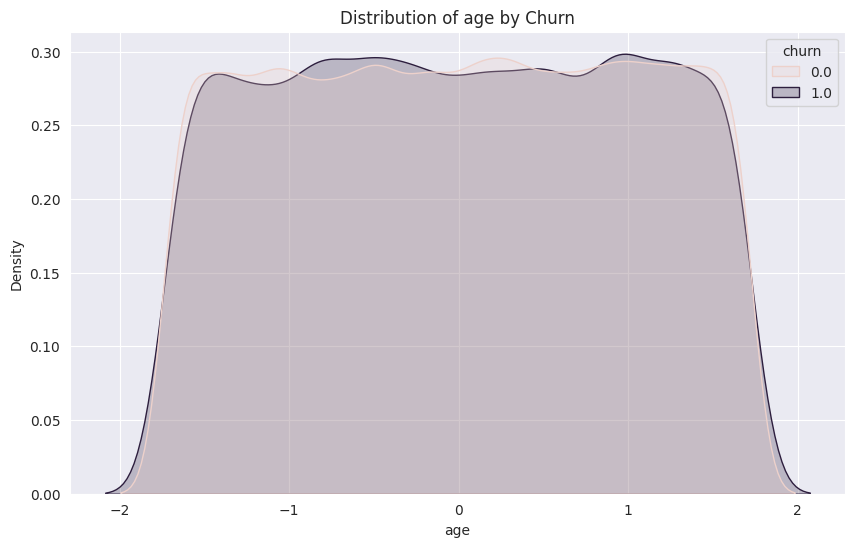

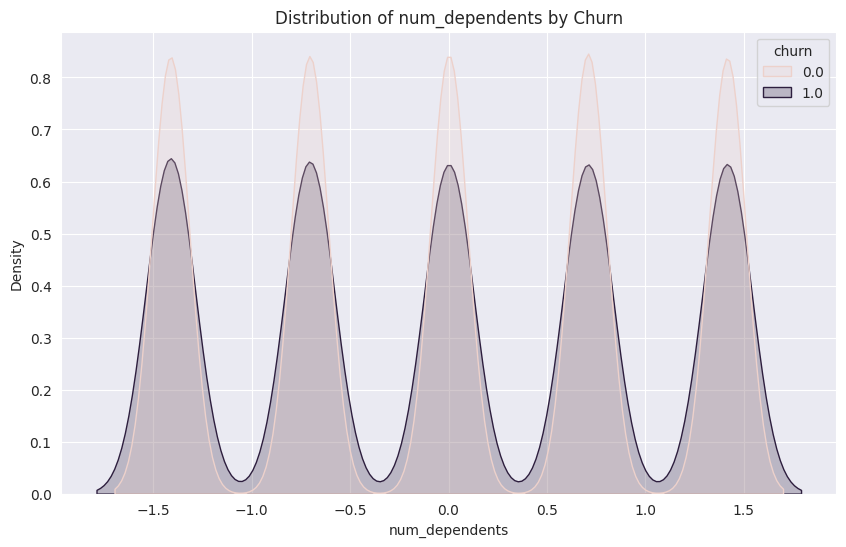

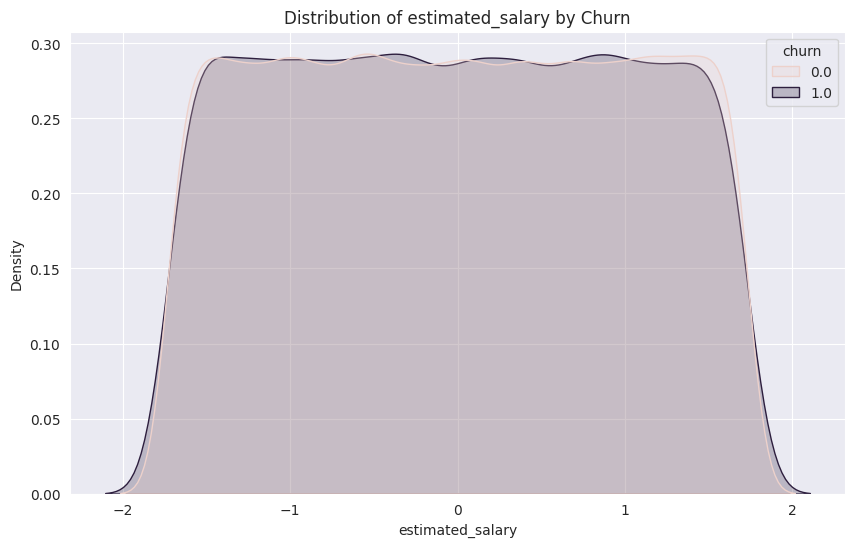

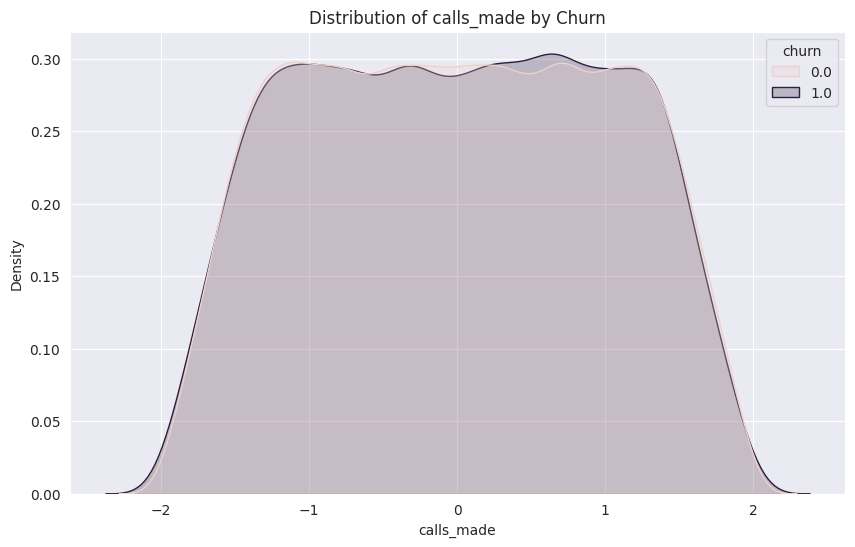

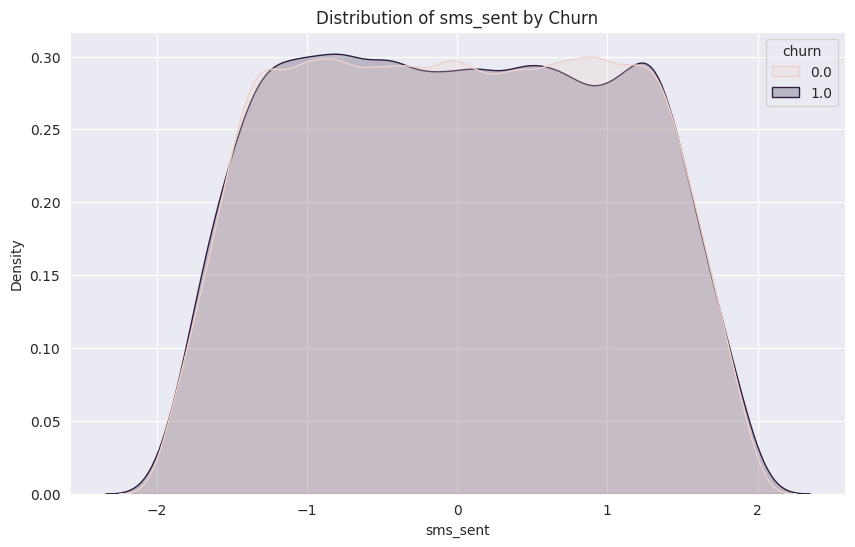

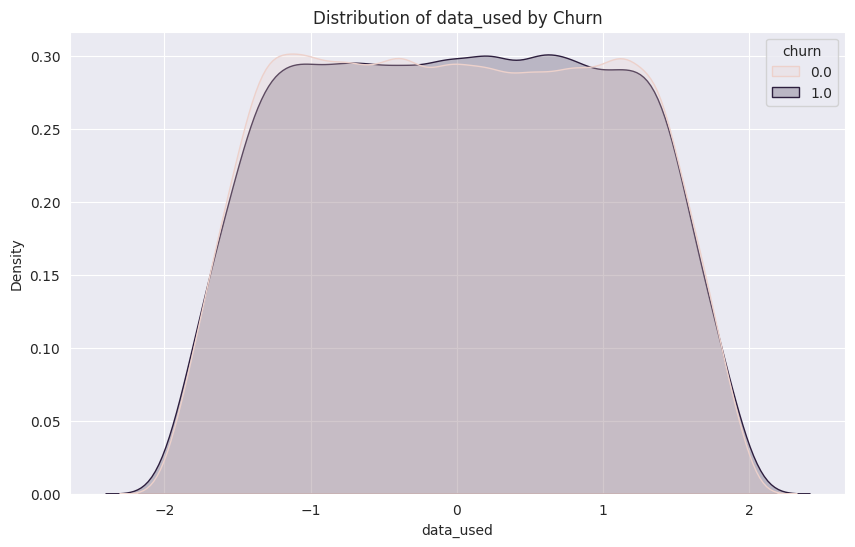

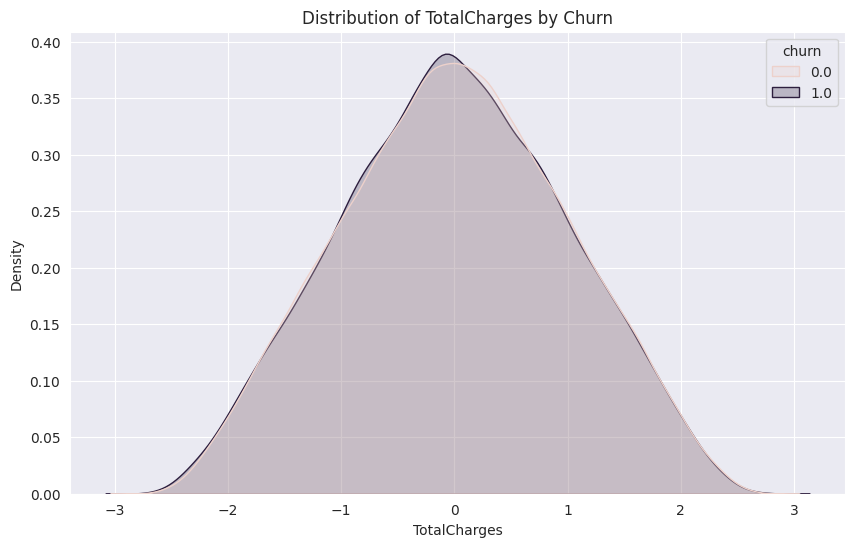

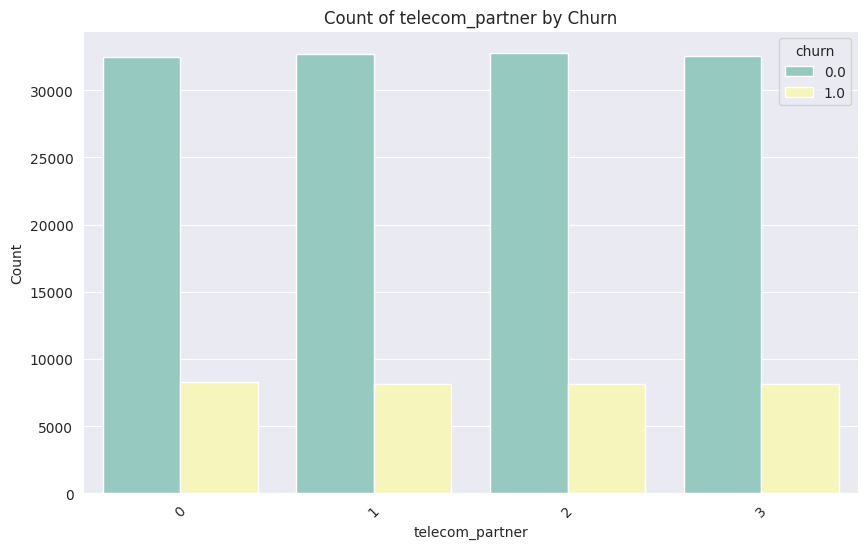

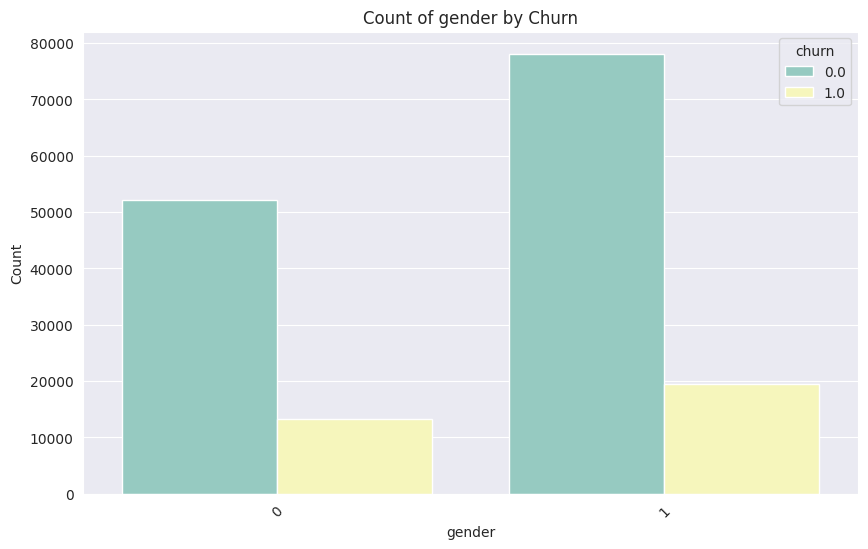

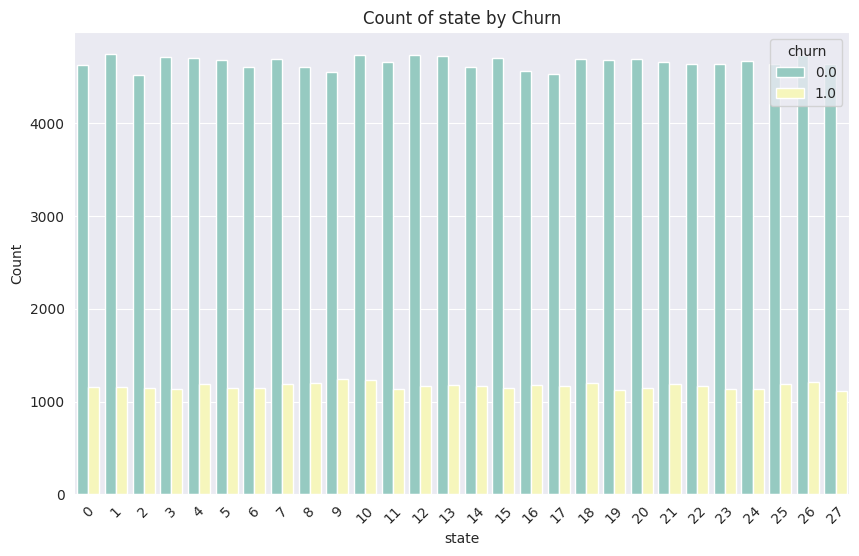

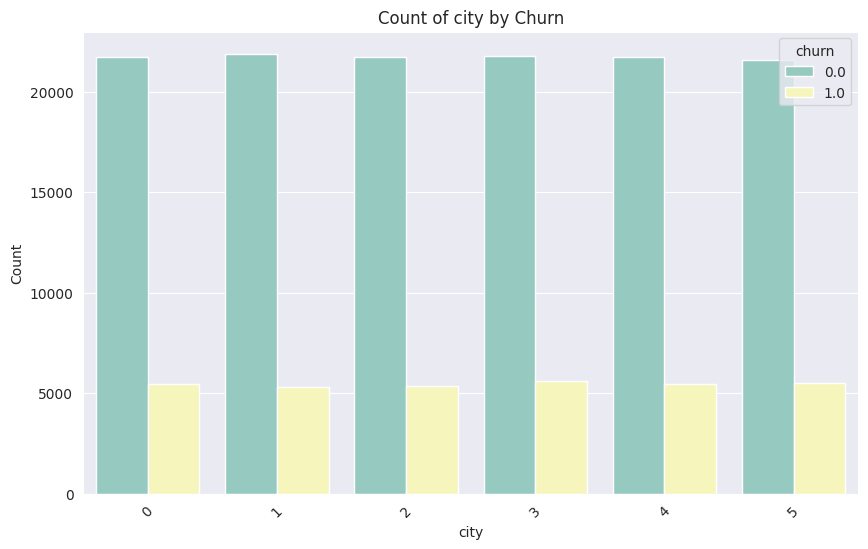

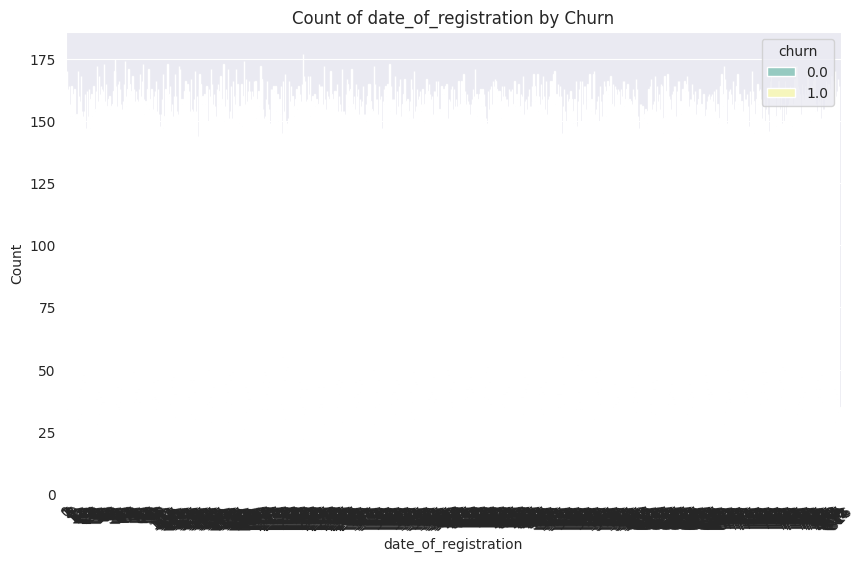

In [ ]:
# Summary statistics of numerical columns
print(df.describe())

# Class distribution of 'churn'
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df)
plt.title('Churn Class Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of numerical features for churn and non-churn customers
numerical_features = ['age', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature, hue='churn', fill=True, common_norm=False)
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

# Visualize categorical features
categorical_features = ['telecom_partner', 'gender', 'state', 'city', 'date_of_registration']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='churn')
    plt.title(f'Count of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df.columns

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn', 'TotalCharges'],
      dtype='object')

In [ ]:
# Define features (X) and target variable (y)
X = df.drop('churn', axis=1)  # Features (all columns except 'churn')
y = df['churn']  # Target variable ('churn' column)

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (optional, depending on the algorithm)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Check for missing values in the target variable 'churn'
if df['churn'].isnull().any():
    # Remove rows with missing target values
    df.dropna(subset=['churn'], inplace=True)

# Define features (X) and target variable (y)
X = df.drop('churn', axis=1)  # Features (all columns except 'churn')
y = df['churn']  # Target variable ('churn' column)

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (optional, depending on the algorithm)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_rep}")

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{confusion_mat}")


Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     26165
         1.0       0.00      0.00      0.00      6449

    accuracy                           0.80     32614
   macro avg       0.40      0.50      0.45     32614
weighted avg       0.64      0.80      0.71     32614

Confusion Matrix:
[[26165     0]
 [ 6449     0]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy for Decision Tree: {accuracy_dt:.2f}")

# Generate a classification report for Decision Tree
classification_rep_dt = classification_report(y_test, y_pred_dt)
print(f"Classification Report for Decision Tree:\n{classification_rep_dt}")

# Create a confusion matrix for Decision Tree
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Confusion Matrix for Decision Tree:\n{confusion_mat_dt}")


Accuracy for Decision Tree: 0.66
Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79     26165
         1.0       0.19      0.22      0.21      6449

    accuracy                           0.66     32614
   macro avg       0.50      0.50      0.50     32614
weighted avg       0.68      0.66      0.67     32614

Confusion Matrix for Decision Tree:
[[20247  5918]
 [ 5019  1430]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy for Random Forest: {accuracy_rf:.2f}")

# Generate a classification report for Random Forest
classification_rep_rf = classification_report(y_test, y_pred_rf)
print(f"Classification Report for Random Forest:\n{classification_rep_rf}")

# Create a confusion matrix for Random Forest
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix for Random Forest:\n{confusion_mat_rf}")


Accuracy for Random Forest: 0.80
Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     26165
         1.0       0.00      0.00      0.00      6449

    accuracy                           0.80     32614
   macro avg       0.40      0.50      0.45     32614
weighted avg       0.64      0.80      0.71     32614

Confusion Matrix for Random Forest:
[[26163     2]
 [ 6449     0]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gradient_boosting_model.predict(X_test)

# Calculate accuracy for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy for Gradient Boosting: {accuracy_gb:.2f}")

# Generate a classification report for Gradient Boosting
classification_rep_gb = classification_report(y_test, y_pred_gb)
print(f"Classification Report for Gradient Boosting:\n{classification_rep_gb}")

# Create a confusion matrix for Gradient Boosting
confusion_mat_gb = confusion_matrix(y_test, y_pred_gb)
print(f"Confusion Matrix for Gradient Boosting:\n{confusion_mat_gb}")


Accuracy for Gradient Boosting: 0.80
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     26165
         1.0       0.00      0.00      0.00      6449

    accuracy                           0.80     32614
   macro avg       0.40      0.50      0.45     32614
weighted avg       0.64      0.80      0.71     32614

Confusion Matrix for Gradient Boosting:
[[26163     2]
 [ 6449     0]]


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Check for missing values in the target variable 'churn'
if df['churn'].isnull().any():
    # Remove rows with missing target values
    df.dropna(subset=['churn'], inplace=True)

# Define features (X) and target variable (y)
X = df.drop('churn', axis=1)  # Features (all columns except 'churn')
y = df['churn']  # Target variable ('churn' column)

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (optional, depending on the algorithm)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Define hyperparameters to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.80
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
ROC AUC: 0.50


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Define a smaller set of hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)

# Use the best model from GridSearchCV
best_model_dt = grid_search_dt.best_estimator_

y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")



Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10}
Accuracy: 0.80
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
ROC AUC: 0.50


USING SMOTE TECHNIQUE TO FIND FOR BETTER ACCURACY


In [ ]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=model.fit_transform(df[i])

In [ ]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,TotalCharges
0,1,2,0,-1.284567,10,4,755597,0,1.416117,1.063323,-0.167823,1.428553,-1.816812,0.0,0.891292
1,2,2,0,0.540376,16,5,125926,0,0.001193,1.212241,0.443844,1.021052,0.334982,0.0,1.035630
2,3,3,0,0.662038,1,2,423976,0,-1.413731,1.698660,0.002085,0.002300,-1.628606,1.0,0.003100
3,4,1,1,-0.007107,22,4,522841,0,-0.706269,-1.232473,1.055510,0.070217,1.491393,1.0,0.795850
4,5,1,0,-1.223736,24,2,740247,0,0.001193,-0.796527,0.987547,-0.608951,-1.220941,0.0,0.267654


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop("churn",axis=1)
y=df['churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
x_train1, y_train1 = smote.fit_resample(x_train, y_train)
from sklearn.preprocessing import StandardScaler

model=StandardScaler()

x_train1=pd.DataFrame(model.fit_transform(x_train1),columns=x_train.columns)
x_test=pd.DataFrame(model.fit_transform(x_test),columns=x_test.columns)
x_train1.shape

(208556, 14)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier7 = LogisticRegression()
classifier7.fit(x_train1,y_train1)

LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train,y_train)

print("accuracy without smoting",classifier.score(x_test,y_test))

accuracy without smoting 0.4960139817256393


In [ ]:
y_pred7 = classifier7.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)

[[13583 12520]
 [ 3330  3181]]


In [ ]:
print("accuracy with smoting",classifier7.score(x_test,y_test))

accuracy with smoting 0.5140123873183295


Text(0.5, 1.0, 'confusion matrix for Logistic regression')

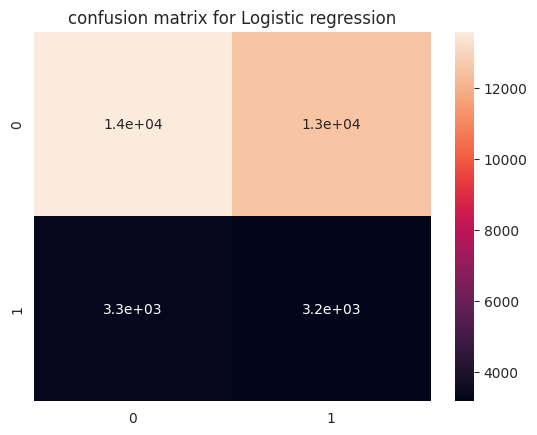

In [ ]:
cn=confusion_matrix(y_test,y_pred7)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Logistic regression")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train1,y_train1)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
print("smoting data score in svm",clf.score(x_test,y_test))

smoting data score in svm 0.22343165511743424


In [ ]:
# Create Decision Tree classifer object
clfd = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfd = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clfd.predict(x_test)
print("score on non smoting data",clfd.score(x_test,y_test))

score on non smoting data 0.5765622125467591


Text(0.5, 1.0, 'confusion matrix for Decision tree classifier')

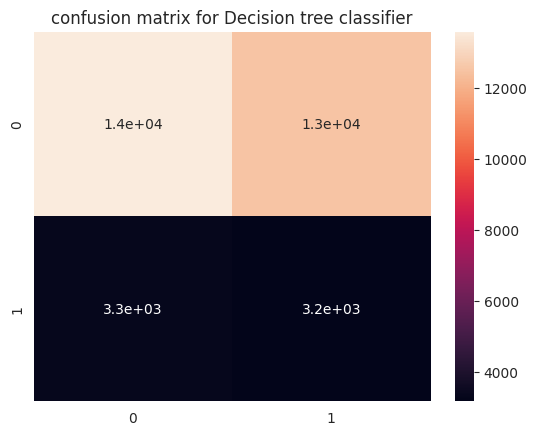

In [ ]:
cn=confusion_matrix(y_test,y_pred7)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Decision tree classifier")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(x_train1, y_train1)
classifier_rf.score(x_test,y_test)

0.4620715030355062

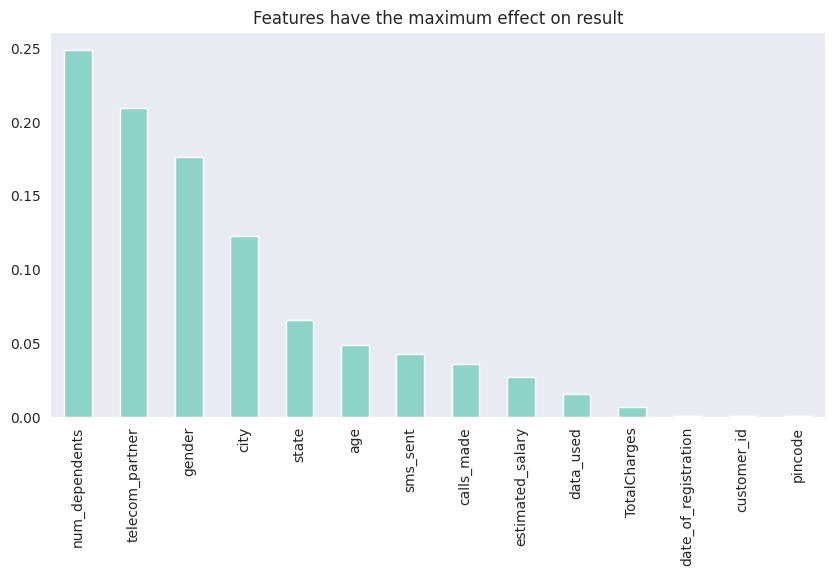

In [ ]:
#Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(classifier_rf.feature_importances_, index=x_train1.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
# Plot a simple bar chart
feature_importances.plot.bar();
plt.grid()
plt.title("Features have the maximum effect on result")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1, random_state=0).fit(x_train1, y_train1)
lf.score(x_test, y_test)

0.19966885386643773

Text(0.5, 1.0, 'confusion matrix for gradient boosting  classifier')

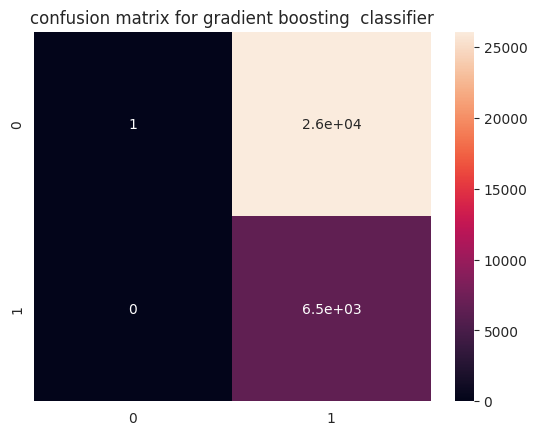

In [ ]:
y_pred = lf.predict(x_test)
cn=confusion_matrix(y_test,y_pred)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for gradient boosting  classifier")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1, random_state=0).fit(x_train, y_train)
print("score on non smoting data",lf.score(x_test, y_test))

score on non smoting data 0.1996381921874042
